In [1]:
import pandas as pd
import numpy as np
import itertools
from matplotlib import pyplot as plt
import os
from math import sqrt


In [2]:
data = pd.read_csv('.//1.csv')  # 就是附件1
data = data.sort_index()  # 整理索引 防止索引乱序
data_n = pd.DataFrame(data,columns =["user_id","metrics","ds","value_avg"])
user_id_list = list(set(data['user_id'].tolist()))


load metrics and pad

In [3]:
metrics_list = ['13,1,11', '13,1,6', '1,1,2', '4,2,5', '4,2,1', '4,2,2', '1,1,1', '13,1,8', '4,1,2', '13,1,7', 
        '13,1,4', '4,1,5', '1,1,4', '4,1,4', '4,1,3', '4,2,3', '4,1,1', '13,1,9', '4,2,4', '1,1,3']
user_id_list = list(set(data_n['user_id'].tolist()))  # 获得全部的用户id和全部的指标类型
# metrics_list = list(set(data['metrics'].tolist()))

maxlen = 122
# for metric in metrics_list:
#     print(metric)
#     for user_id in user_id_list:
#         userlen = np.array(data_n.loc[(data['user_id'] == user_id) & (
#             data_n['metrics'] == metric), 'value_avg']).shape[0]
#         if (userlen>maxlen):
#             maxlen = userlen
print("maxlen:",maxlen)
all_info = {}

#填充到长度相等
for metric in metrics_list:
    m = []
    print(metric)
    for user_id in user_id_list:
        
        d1 = np.array(data_n.loc[(data['user_id'] == user_id) & (
            data_n['metrics'] == metric), 'value_avg']).tolist()
        if len(d1)<2:
            continue
        dn = d1[-1]
        d1.extend([dn for i in range(maxlen - len(d1))])
        m.append(d1)
    print(np.array(m).shape)
    all_info[metric] = np.array(m)


    

maxlen: 122
13,1,11
(241, 122)
13,1,6
(241, 122)
1,1,2
(241, 122)
4,2,5
(247, 122)
4,2,1
(247, 122)
4,2,2
(247, 122)
1,1,1
(241, 122)
13,1,8
(241, 122)
4,1,2
(247, 122)
13,1,7
(241, 122)
13,1,4
(241, 122)
4,1,5
(247, 122)
1,1,4
(241, 122)
4,1,4
(247, 122)
4,1,3
(247, 122)
4,2,3
(247, 122)
4,1,1
(247, 122)
13,1,9
(250, 122)
4,2,4
(247, 122)
1,1,3
(241, 122)


calculate the binary value

In [5]:

epsi = 0.1
all_info_binary = all_info.copy()
for metric in metrics_list:
    m = all_info_binary[metric]
    m = np.array(m)
    avr  = np.mean(m,1)
    avr = np.atleast_2d(avr)
    m[m<avr.T*0.1] = 0
    m[m< epsi] = 0
    m[m>0]=1
    all_info_binary[metric] = m
    

draw all the tendency 

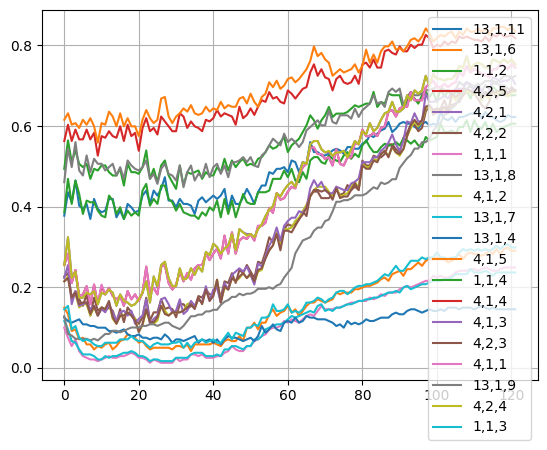

In [8]:

date = np.arange(122)
for metric in metrics_list:
    m = all_info_binary[metric]
    ratio = np.sum(m,0)
    ratio = (m.shape[0]-ratio)/m.shape[0]
    plt.plot(date,ratio,label=metric)

plt.grid()
plt.legend()
plt.show()